In [2]:

def raw_universities_map_to_schedule(unis):
    # For each of the unis, make the time offset relative to UTC-5
    for uni in unis:
        unis[uni]["timezone_offset"] = unis[uni]["timezone_offset"] + 5
        for day in unis[uni]["unavailableTimes"]:
            for time in unis[uni]["unavailableTimes"][day]:
                time["start"] = 3 * (time["start"] + unis[uni]["timezone_offset"])
                # -1 because the end time is exclusive
                time["end"] = 3 * (time["end"] + unis[uni]["timezone_offset"])

    # For each of the unis, make it into distinct 20 minute time block arrays for each day of the week
    # from 8am to 7:20pm

    for uni in unis:
        for day in ['M', 'T', 'W', 'Th', 'F']:
            if not unis[uni].get('schedule'):
                unis[uni]['schedule'] = {}
            # for time in range(8, 20):
            unis[uni]['schedule'][day] = {
                # Meeting block that *starts at* the time is by default available
                time: False for time in range(8 * 3, 19 * 3 + 1)
            }

    # For each of the chairs, make 9:20-9:40, 2:20-2:40, and 12:20 to 1:00 unavailable for each day of the week
    for uni in unis:
        tz_offset = unis[uni]["timezone_offset"]
        for day in ['M', 'T', 'W', 'Th', 'F']:
            start_coffee_1 = (9 - tz_offset) * 3 + 1
            # Check if exists
            if start_coffee_1 in unis[uni]['schedule'][day]:
                unis[uni]['schedule'][day][start_coffee_1] = True

            start_coffee_2 = (14 - tz_offset) * 3 + 1
            # Check if exists
            if start_coffee_2 in unis[uni]['schedule'][day]:
                unis[uni]['schedule'][day][start_coffee_2] = True

            start_lunch = (12 - tz_offset) * 3 + 1
            for time in range(start_lunch, start_lunch + 2):
                # Check if exists
                if time in unis[uni]['schedule'][day]:
                    unis[uni]['schedule'][day][time] = True

            # Add a time after which NO meetings should be schedules (7:20pm local onwards)
            clock_out = (19 - tz_offset) * 3 + 1
            for time in range(clock_out, 24*3):
                # Check if exists
                if time in unis[uni]['schedule'][day]:
                    unis[uni]['schedule'][day][time] = True
    
            # Add a time before which NO meetings should be scheduled (ie. prior to 8am)
            clock_in = (8 - tz_offset) * 3
            for time in range(0, clock_in):
                # Check if exists
                if time in unis[uni]['schedule'][day]:
                    unis[uni]['schedule'][day][time] = True

    # For all of the unavailable times, make them unavailable in the schedule
    for uni in unis:
        for day in unis[uni]["unavailableTimes"]:
            for time in unis[uni]["unavailableTimes"][day]:
                for i in range(time["start"], time["end"]):
                    # Check if exists
                    if i in unis[uni]["schedule"][day]:
                        unis[uni]["schedule"][day][i] = True

    return unis

In [3]:

def plot_schedule_map(unis):
    # Plot the schedule for each chair
    import matplotlib.pyplot as plt
    import numpy as np

    # Create a plot for each course
    for uni_id, data in unis.items():
        plt.figure(figsize=(11, 5))
        plt.title(f"Timetable for {uni_id} - {data['university']}")
        for day, schedule in data['schedule'].items():
            for hour, occupied in schedule.items():
                if occupied:
                    plt.plot(hour, day, 'bs', markersize=10)  # Blue square for occupied hours
                else:
                    plt.plot(hour, day, 'rs',
                             markersize=10)  # Red square for available hours
        plt.yticks(range(5), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
        plt.gca().invert_yaxis()
        plt.xticks(np.arange(8 * 3, 19 * 3, 3), [f"{i // 3}:{i % 3}0" for i in range(8 * 3, 19 * 3, 3)])
        plt.xlabel('Hour')
        plt.ylabel('Day of Week')
        plt.grid(True)
        plt.tight_layout()

    plt.show()

## Plotting Availability

In [4]:
# By default, available from 8AM-7:20PM ET

# Unavailable time given the member
# Chairs 
# C1 The University of British Columbia M/W 10 to 12
# C2 University of Calgary T/Th 2 to 4
# C3 National Research Council Canada M/W 1 o 3
# C4 York University T/F 9 to 11
# C5 University of California – San Diego Th 8 to 12
# C6 Université de Sherbrooke W/F 10 to 12
# C7 University of Victoria T/Th 1 to 3
# C8 Université Laval Th 8 to 12
# C9 Hydro-Québec T/F 10 to 12
# C10 Canadian Food Inspection Agency M/F 11 to 2


# ChatGPT Prompt
#####
# 
# For each of these Universities, make a JSON file to encode the information, and the UTC timezone offset, with the keys C1, C2, etc.
# 
# For the unavailableTime, make it another object e.g. {
#   M: [10, 12],
#   W: [13, 16]
# }
# 
# ```
# # Chairs 
# # C1 The University of British Columbia M/W 10 to 12
# # C2 University of Calgary T/Th 2 to 4
# # C3 National Research Council Canada M/W 1 o 3
# # C4 York University T/F 9 to 11
# # C5 University of California – San Diego Th 8 to 12
# # C6 Université de Sherbrooke W/F 10 to 12
# # C7 University of Victoria T/Th 1 to 3
# # C8 Université Laval Th 8 to 12
# # C9 Hydro-Québec T/F 10 to 12
# # C10 Canadian Food Inspection Agency M/F 11 to 2
# ```
chairs = {
    "C1": {
        "university": "The University of British Columbia",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -8
    },
    "C2": {
        "university": "University of Calgary",
        "unavailableTimes": {
            "T": [{"start": 14, "end": 16}],
            "Th": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -7
    },
    "C3": {
        "university": "National Research Council Canada",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}],
            "W": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -5
    },
    "C4": {
        "university": "York University",
        "unavailableTimes": {
            "T": [{"start": 9, "end": 11}],
            "F": [{"start": 9, "end": 11}]
        },
        "timezone_offset": -5
    },
    "C5": {
        "university": "University of California – San Diego",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -8
    },
    "C6": {
        "university": "Université de Sherbrooke",
        "unavailableTimes": {
            "W": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C7": {
        "university": "University of Victoria",
        "unavailableTimes": {
            "T": [{"start": 13, "end": 15}],
            "Th": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -8
    },
    "C8": {
        "university": "Université Laval",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C9": {
        "university": "Hydro-Québec",
        "unavailableTimes": {
            "T": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "C10": {
        "university": "Canadian Food Inspection Agency",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 14}],
            "F": [{"start": 11, "end": 14}]
        },
        "timezone_offset": -5
    }
}

/home/k44jiang/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


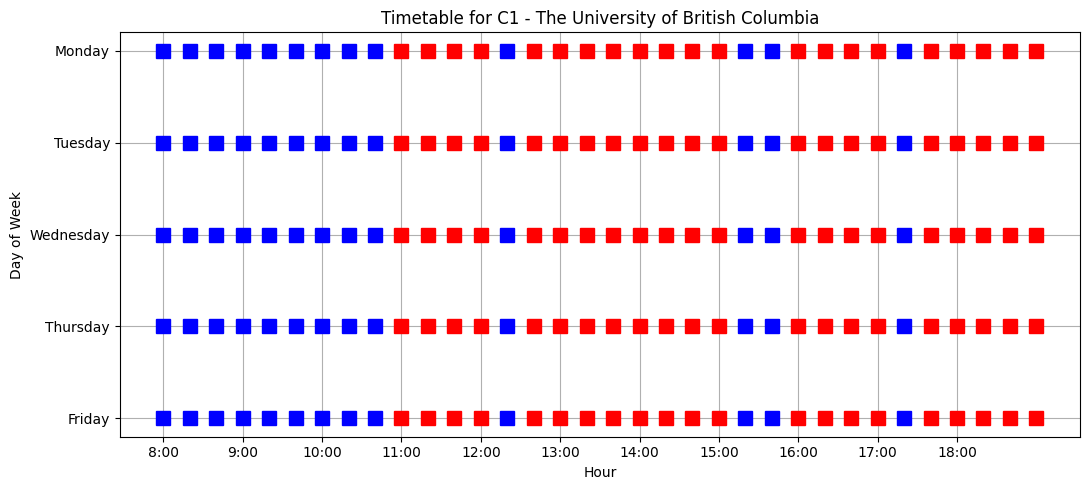

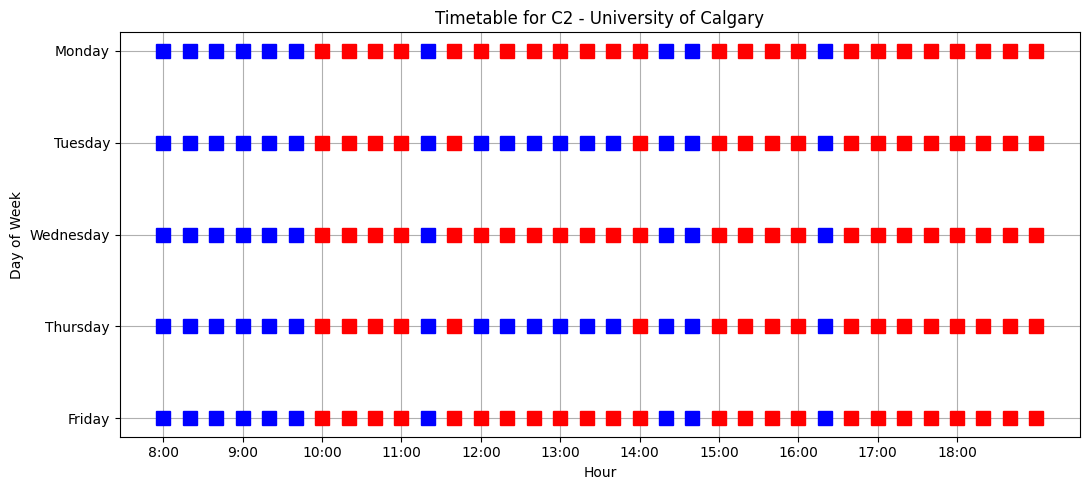

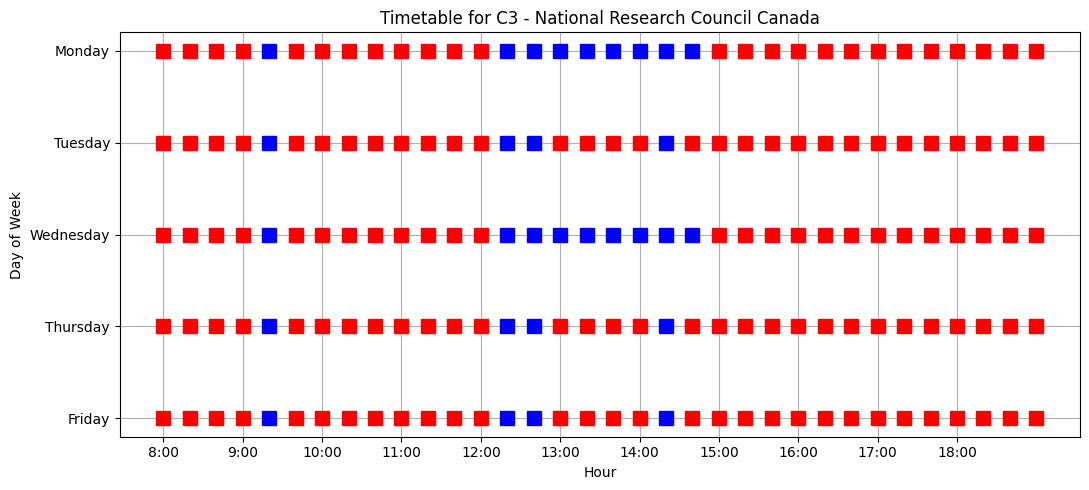

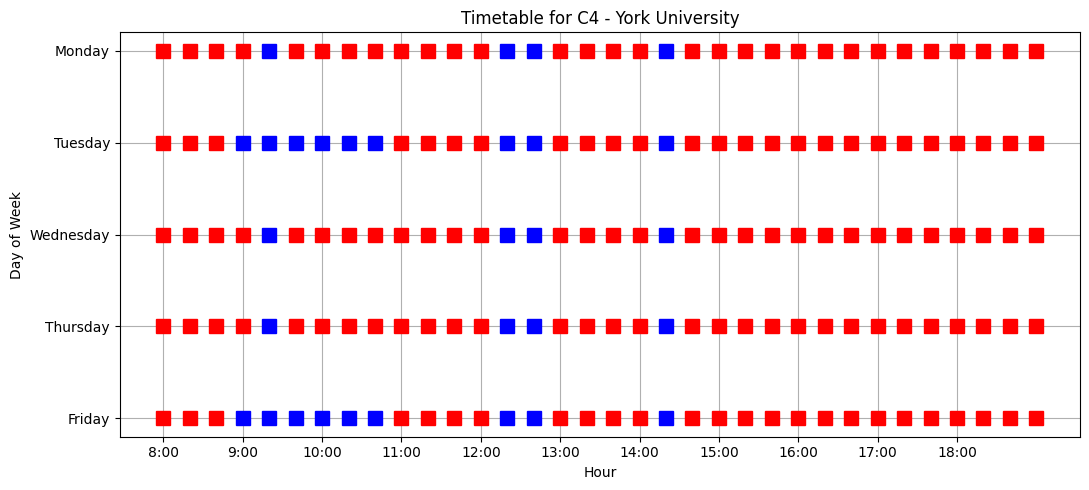

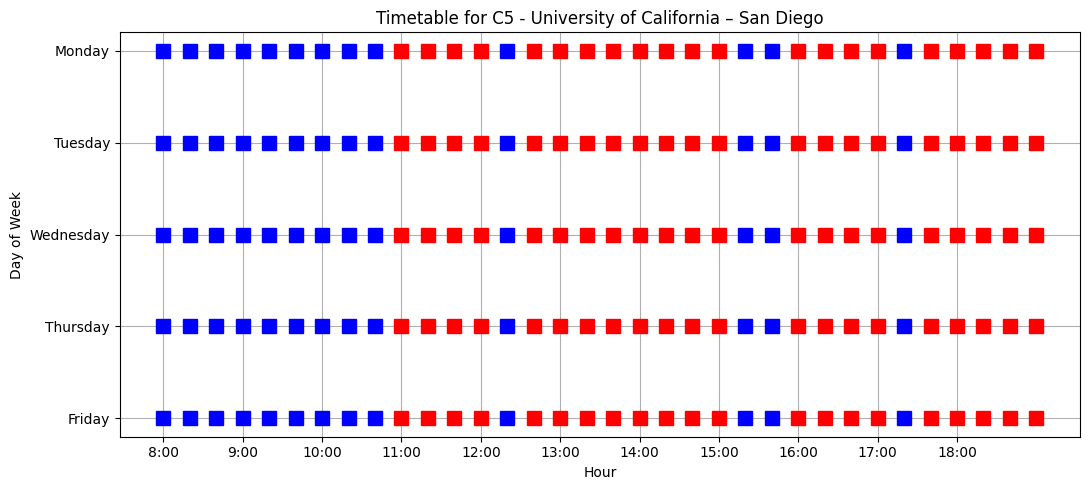

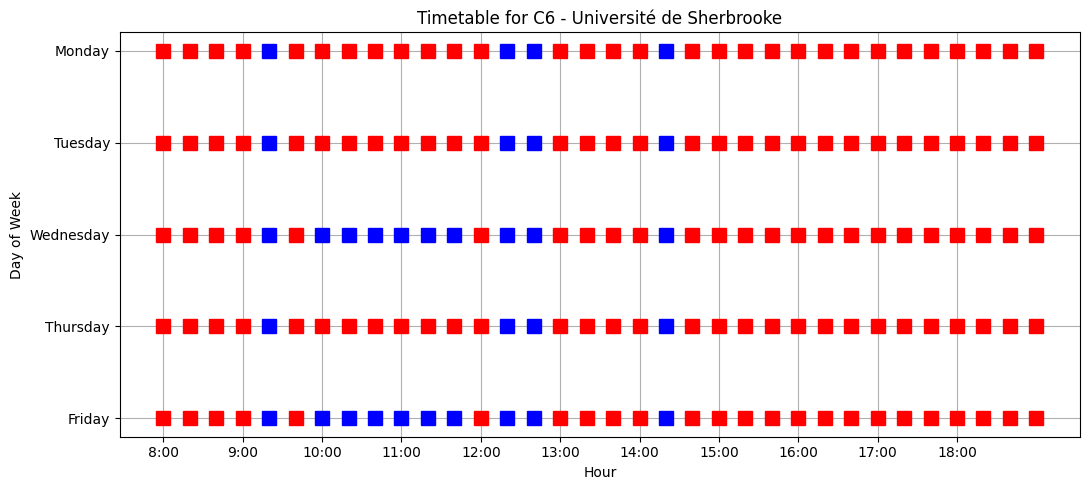

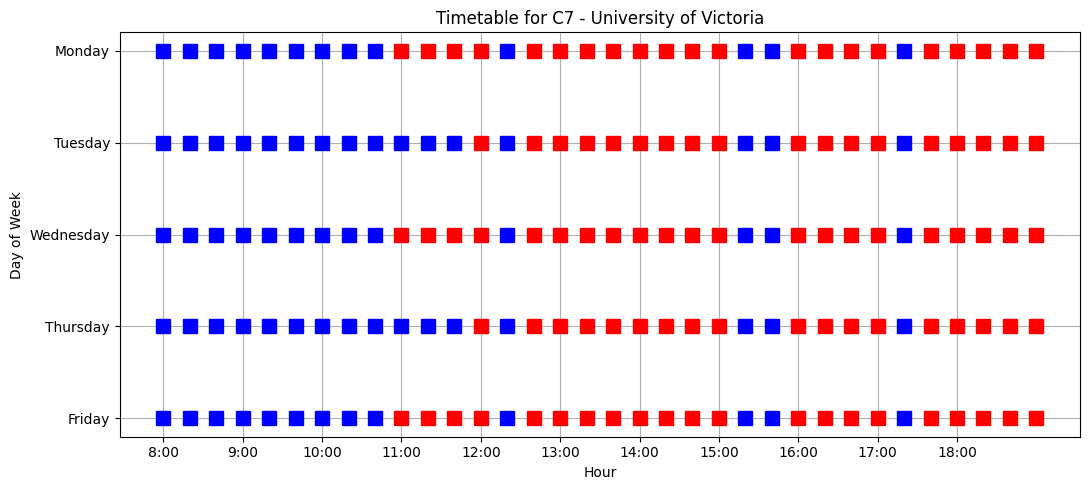

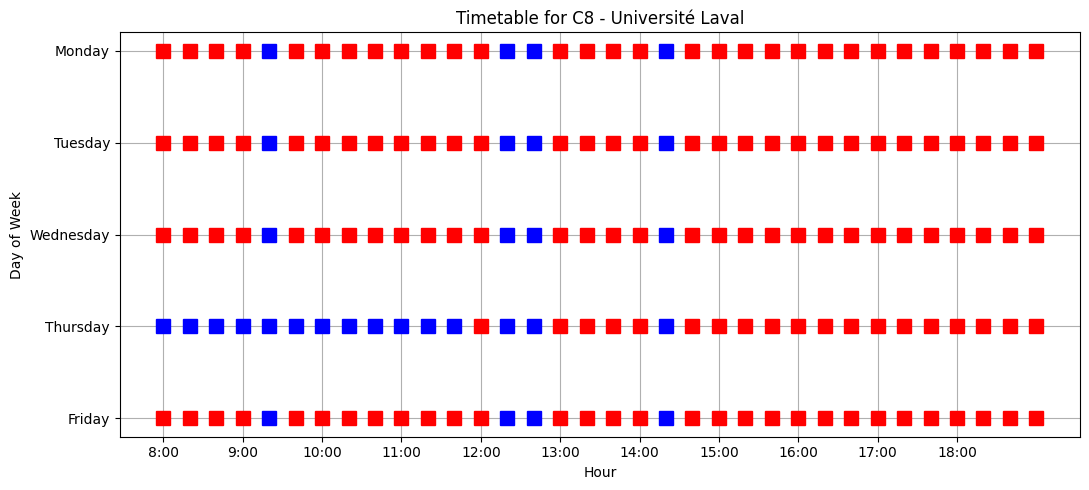

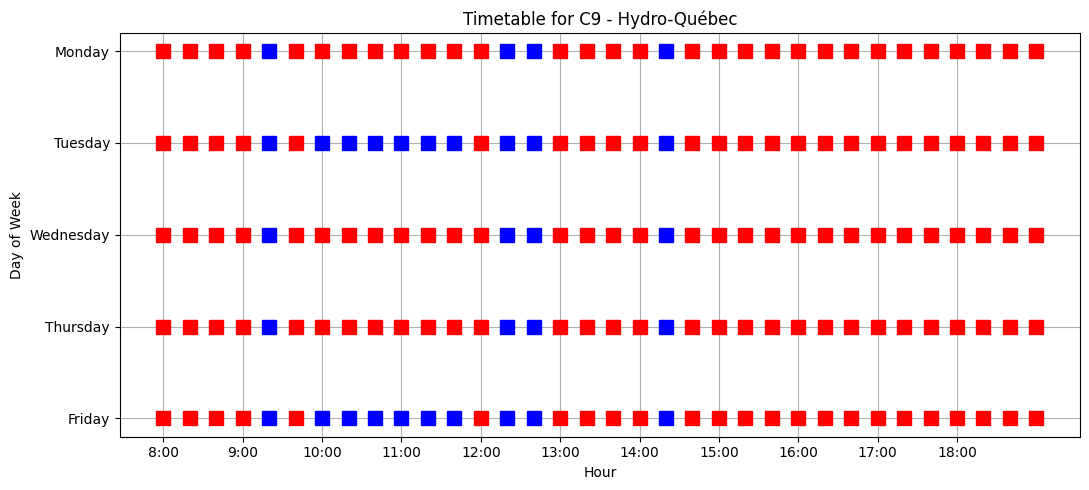

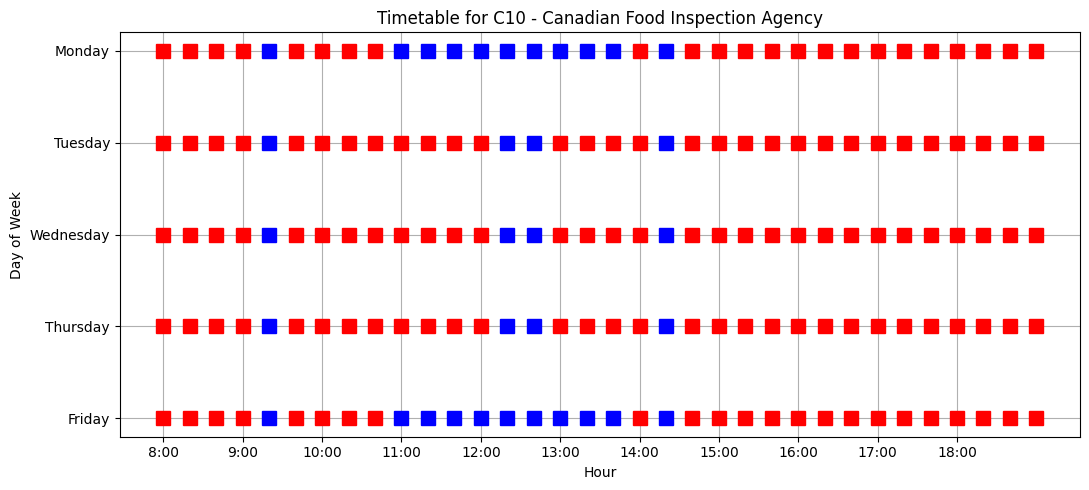

In [5]:
chairs_availability = raw_universities_map_to_schedule(chairs)
plot_schedule_map(chairs)

In [6]:



# Members 
# M1 University of Toronto T/Th 2 to 4
# M2 Toronto Metropolitan University M/W 1 o 3
# M3 University of Michigan T/F 9 to 11
# M4 École Polytechnique de Montréal M/Th 11 to 1
# M5 University of Guelph M/F 2 to 4
# M6 University of Calgary M/F 3 to 5
# M7 University of Prince Edward Island M 1 to 3
# M8 University of Manitoba M/W 10 to 12
# M9 National Research Council Th 8 to 12
# M10 Royal Military College of Canada F 11 to 1
# M11 Dalhousie University M/Th 11 to 1
# M12 University of Windsor M/F 2 to 4
# M13 Queen’s University M/F 3 to 5
# M14 The University of Western Ontario W 12 to 5
# M15 École Polytechnique de Montréal W/F 10 to 12
# M16 Université du Québec en Abitibi-Témiscamingue T/Th 1 to 3
# M17 Université du Québec à Trois Rivieres M/W 10 to 12
# M18 FPrimeC Solutions Inc. T/F 10 to 12
# M19 Institut national de la recherche scientifique Thu 10 to 3
# M20 Université du Québec à Chicoutimi T/Th 3 to 5
# M21 Université Catholique de Louvain M/T 1 to 3
# M22 University of Northern British Columbia Th 8 to 12
# M23 University of Saskatchewan M/T 10 to 12
# M24 University of Alberta T/W 3 to 5
# M25 University of Waterloo T/W 3 to 5
# M26 University of Alberta M/W 10 to 12
# M27 Brock University M/F 11 to 2
# M28 University of Cyprus T/Th 1 to 3
# M29 University of Manitoba F 12 to 4
# M30 McMaster University T/Th 8 to 10

members = {
    "M1": {
        "university": "University of Toronto",
        "unavailableTimes": {
            "T": [{"start": 14, "end": 16}],
            "Th": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -5
    },
    "M2": {
        "university": "Toronto Metropolitan University",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}],
            "W": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -5
    },
    "M3": {
        "university": "University of Michigan",
        "unavailableTimes": {
            "T": [{"start": 9, "end": 11}],
            "F": [{"start": 9, "end": 11}]
        },
        "timezone_offset": -5
    },
    "M4": {
        "university": "École Polytechnique de Montréal",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 13}],
            "Th": [{"start": 11, "end": 13}]
        },
        "timezone_offset": -5
    },
    "M5": {
        "university": "University of Guelph",
        "unavailableTimes": {
            "M": [{"start": 14, "end": 16}],
            "F": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -5
    },
    "M6": {
        "university": "University of Calgary",
        "unavailableTimes": {
            "M": [{"start": 15, "end": 17}],
            "F": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -7
    },
    "M7": {
        "university": "University of Prince Edward Island",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -4
    },
    "M8": {
        "university": "University of Manitoba",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -6
    },
    "M9": {
        "university": "National Research Council",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M10": {
        "university": "Royal Military College of Canada",
        "unavailableTimes": {
            "F": [{"start": 11, "end": 13}]
        },
        "timezone_offset": -5
    },
    "M11": {
        "university": "Dalhousie University",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 13}],
            "Th": [{"start": 11, "end": 13}]
        },
        "timezone_offset": -4
    },
    "M12": {
        "university": "University of Windsor",
        "unavailableTimes": {
            "M": [{"start": 14, "end": 16}],
            "F": [{"start": 14, "end": 16}]
        },
        "timezone_offset": -5
    },
    "M13": {
        "university": "Queen’s University",
        "unavailableTimes": {
            "M": [{"start": 15, "end": 17}],
            "F": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M14": {
        "university": "The University of Western Ontario",
        "unavailableTimes": {
            "W": [{"start": 12, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M15": {
        "university": "École Polytechnique de Montréal",
        "unavailableTimes": {
            "W": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M16": {
        "university": "Université du Québec en Abitibi-Témiscamingue",
        "unavailableTimes": {
            "T": [{"start": 13, "end": 15}],
            "Th": [{"start": 13, "end": 15}]
        },
        "timezone_offset": -5
    },
    "M17": {
        "university": "Université du Québec à Trois Rivieres",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M18": {
        "university": "FPrimeC Solutions Inc.",
        "unavailableTimes": {
            "T": [{"start": 10, "end": 12}],
            "F": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -5
    },
    "M19": {
        "university": "Institut national de la recherche scientifique",
        "unavailableTimes": {
            "Th": [{"start": 10, "end": 15}]
        },
        "timezone_offset": -5
    },
    "M20": {
        "university": "Université du Québec à Chicoutimi",
        "unavailableTimes": {
            "T": [{"start": 15, "end": 17}],
            "Th": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M21": {
        "university": "Université Catholique de Louvain",
        "unavailableTimes": {
            "M": [{"start": 13, "end": 15}],
            "T": [{"start": 13, "end": 15}]
        },
        "timezone_offset": 1
    },
    "M22": {
        "university": "University of Northern British Columbia",
        "unavailableTimes": {
            "Th": [{"start": 8, "end": 12}]
        },
        "timezone_offset": -8
    },
    "M23": {
        "university": "University of Saskatchewan",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "T": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -6
    },
    "M24": {
        "university": "University of Alberta",
        "unavailableTimes": {
            "T": [{"start": 15, "end": 17}],
            "W": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -7
    },
    "M25": {
        "university": "University of Waterloo",
        "unavailableTimes": {
            "T": [{"start": 15, "end": 17}],
            "W": [{"start": 15, "end": 17}]
        },
        "timezone_offset": -5
    },
    "M26": {
        "university": "University of Alberta",
        "unavailableTimes": {
            "M": [{"start": 10, "end": 12}],
            "W": [{"start": 10, "end": 12}]
        },
        "timezone_offset": -7
    },
    "M27": {
        "university": "Brock University",
        "unavailableTimes": {
            "M": [{"start": 11, "end": 14}],
            "F": [{"start": 11, "end": 14}]
        },
        "timezone_offset": -5
    },
    "M28": {
        "university": "University of Cyprus",
        "unavailableTimes": {
            "T": [{"start": 13, "end": 15}],
            "Th": [{"start": 13, "end": 15}]
        },
        "timezone_offset": 2
    },
    "M29": {
        "university": "University of Manitoba",
        "unavailableTimes": {
            "F": [{"start": 12, "end": 16}]
        },
        "timezone_offset": -6
    },
    "M30": {
        "university": "McMaster University",
        "unavailableTimes": {
            "T": [{"start": 8, "end": 10}],
            "Th": [{"start": 8, "end": 10}]
        },
        "timezone_offset": -5
    }
}



/tmp/ipykernel_99483/2957138925.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(11, 5))


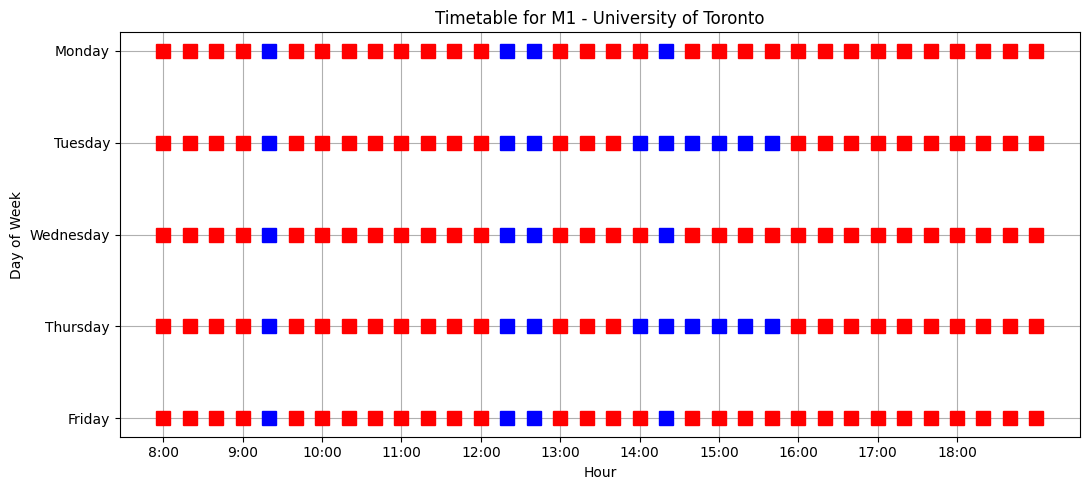

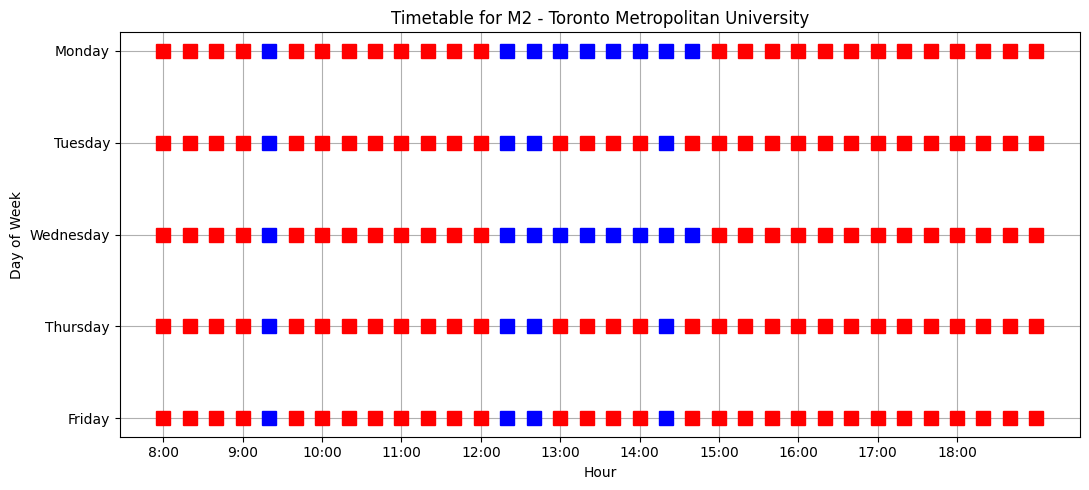

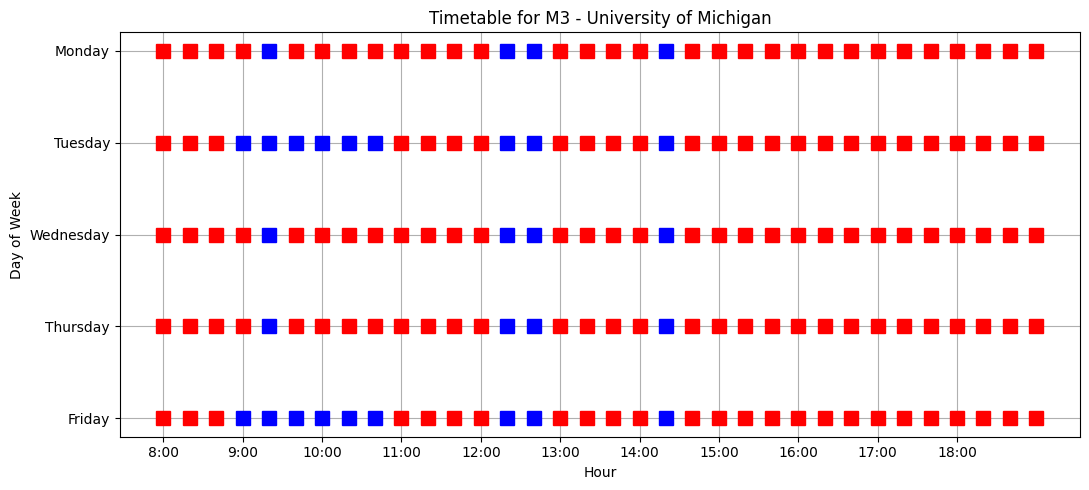

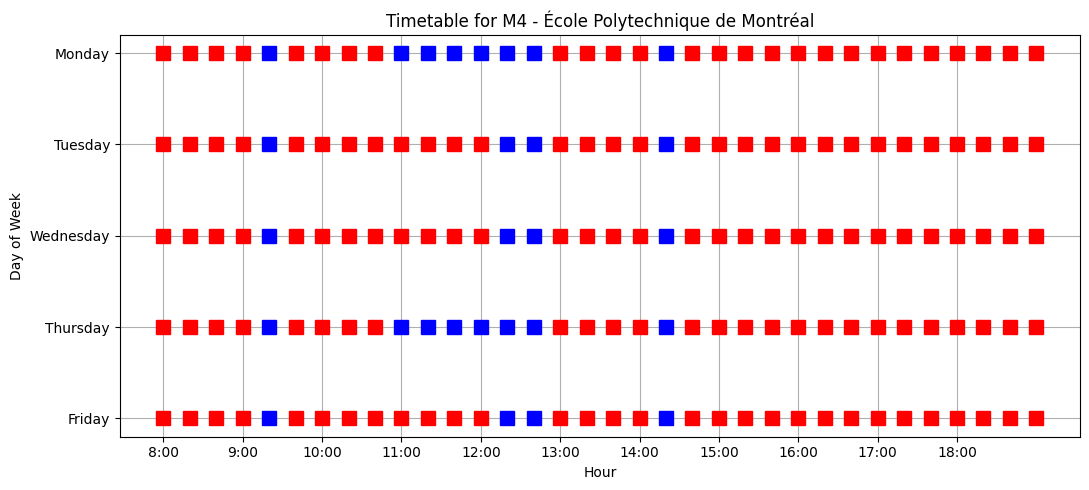

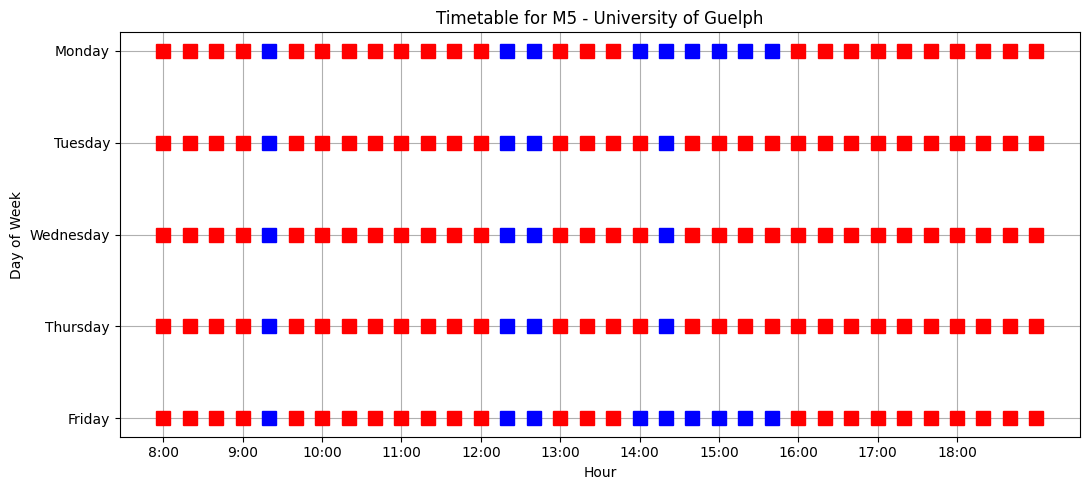

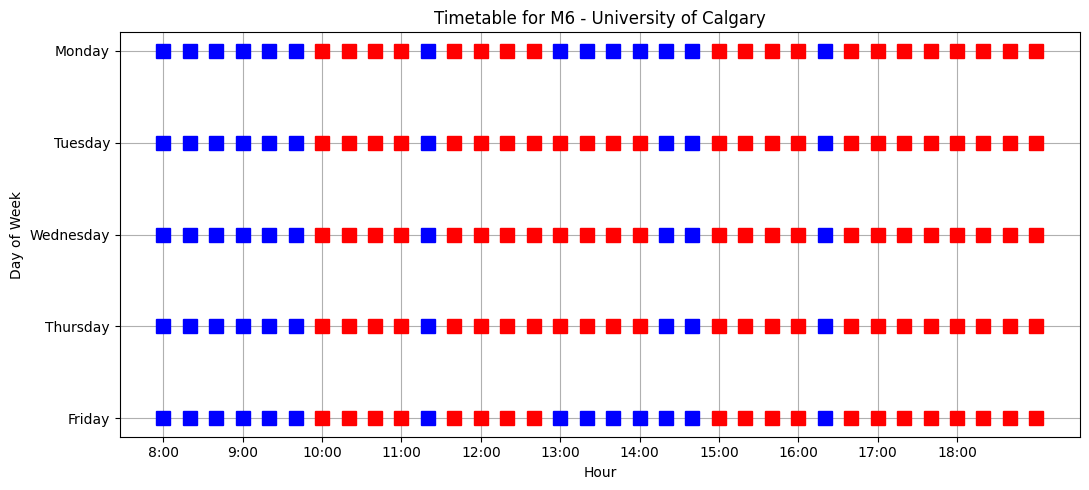

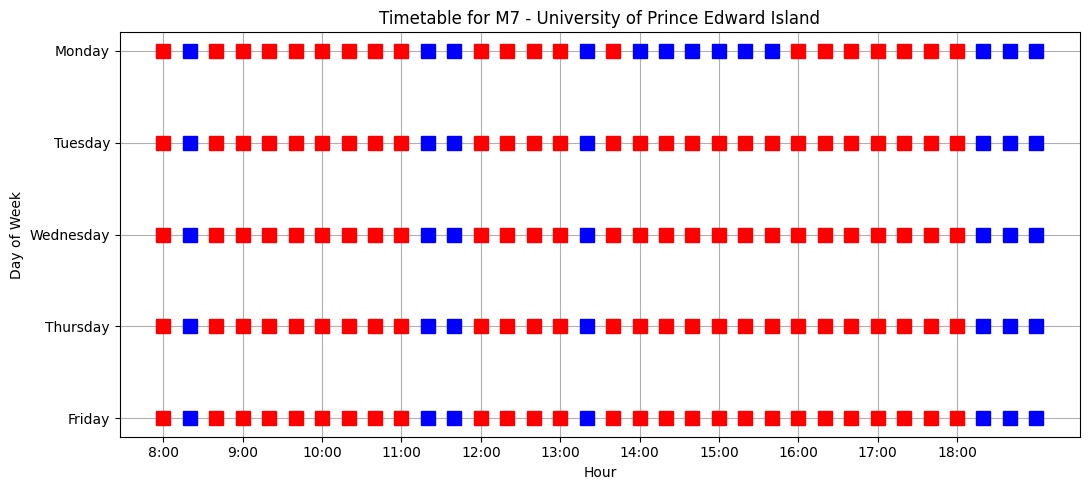

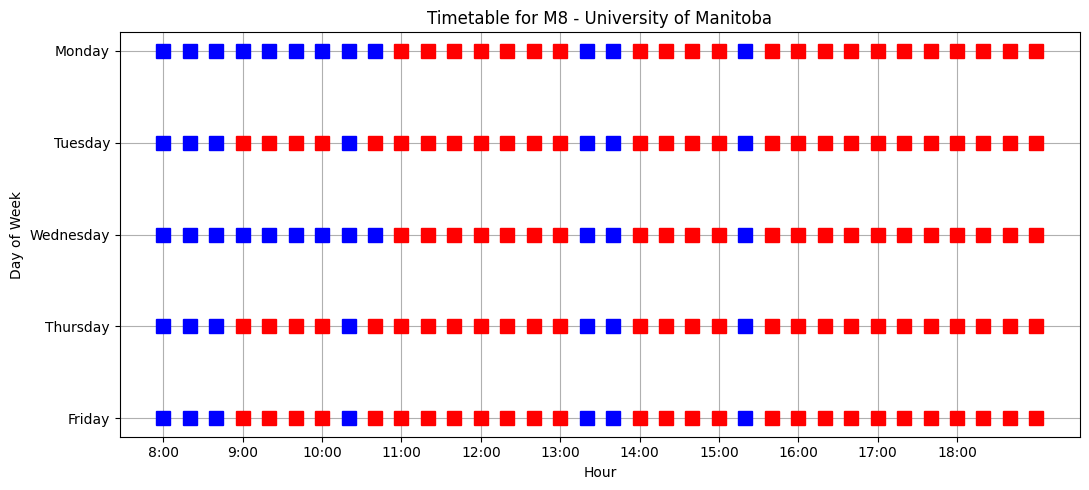

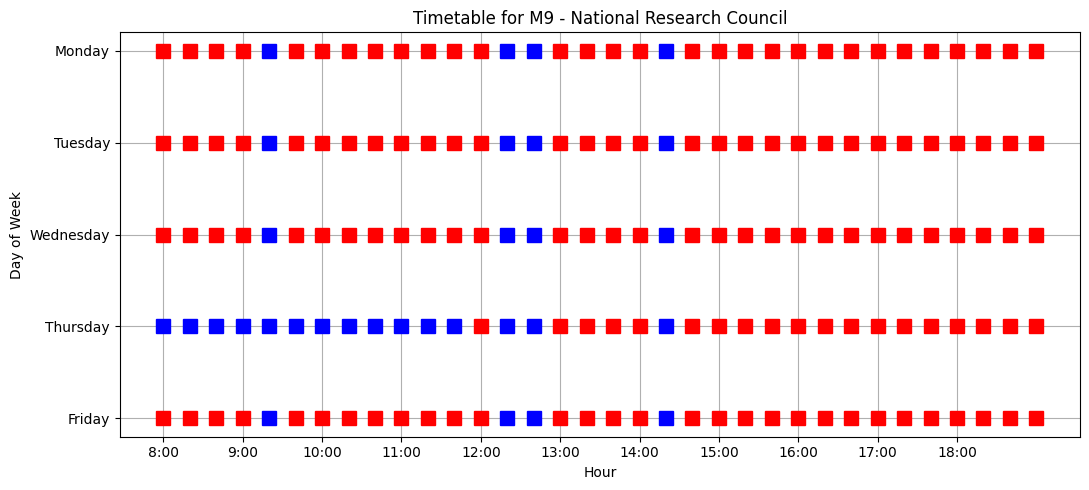

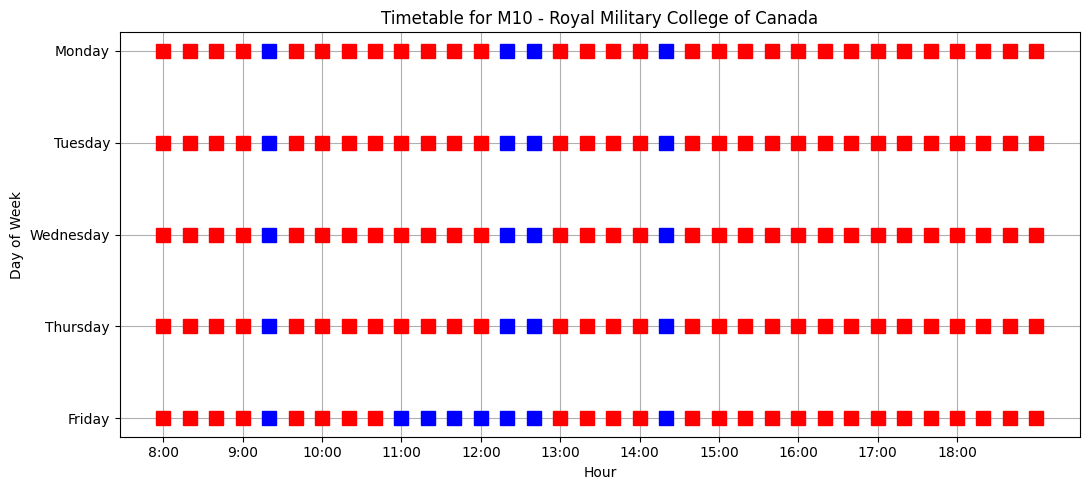

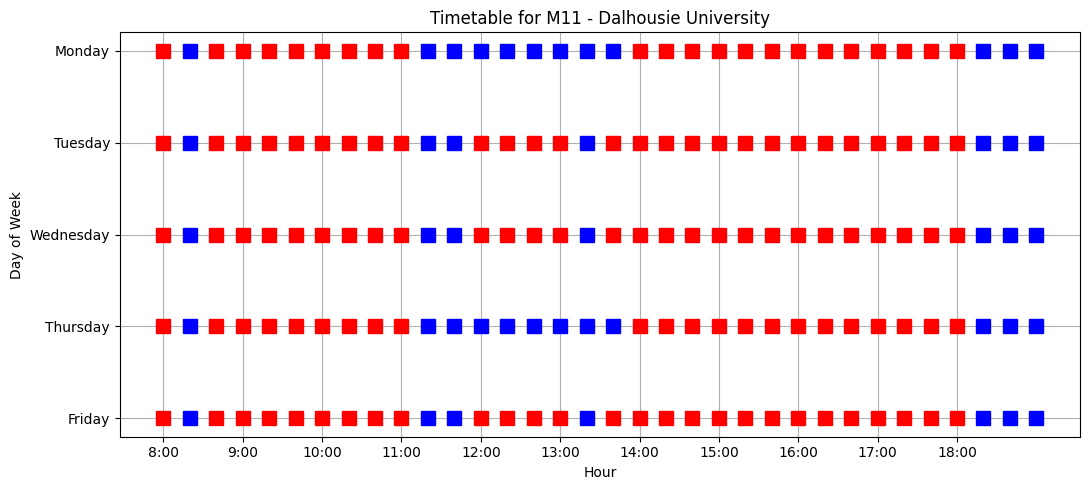

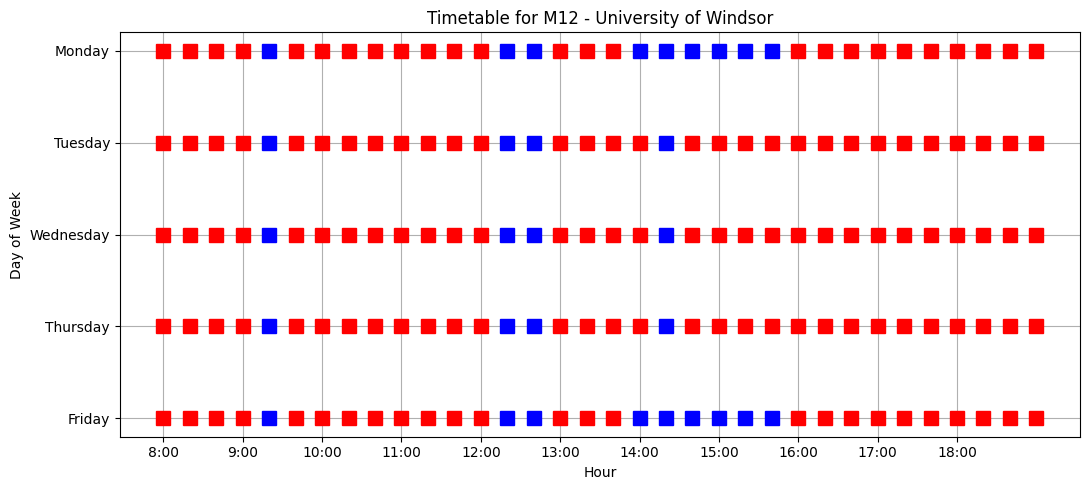

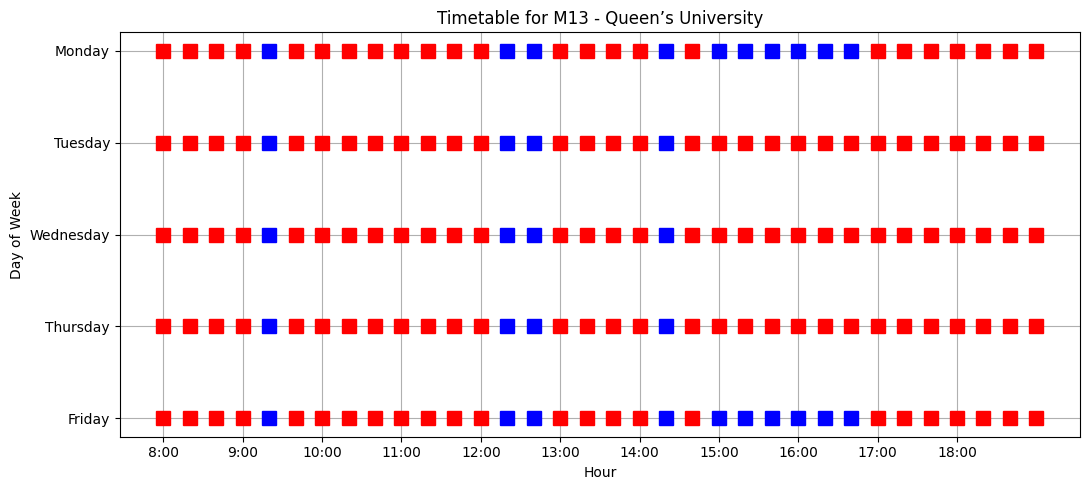

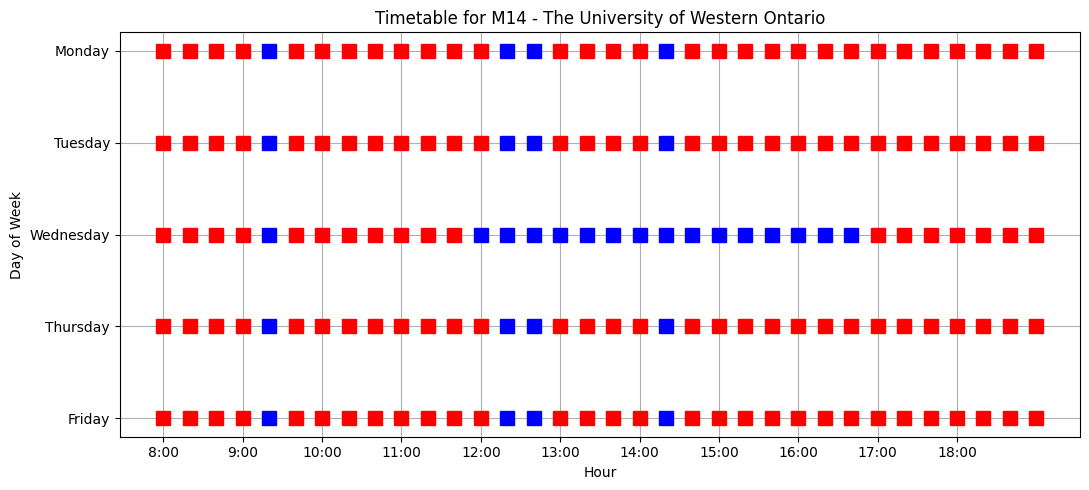

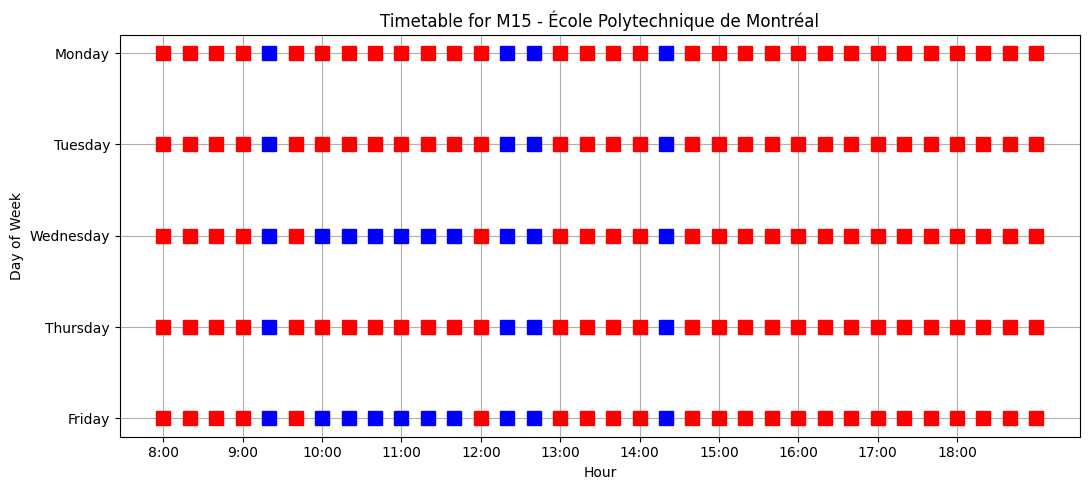

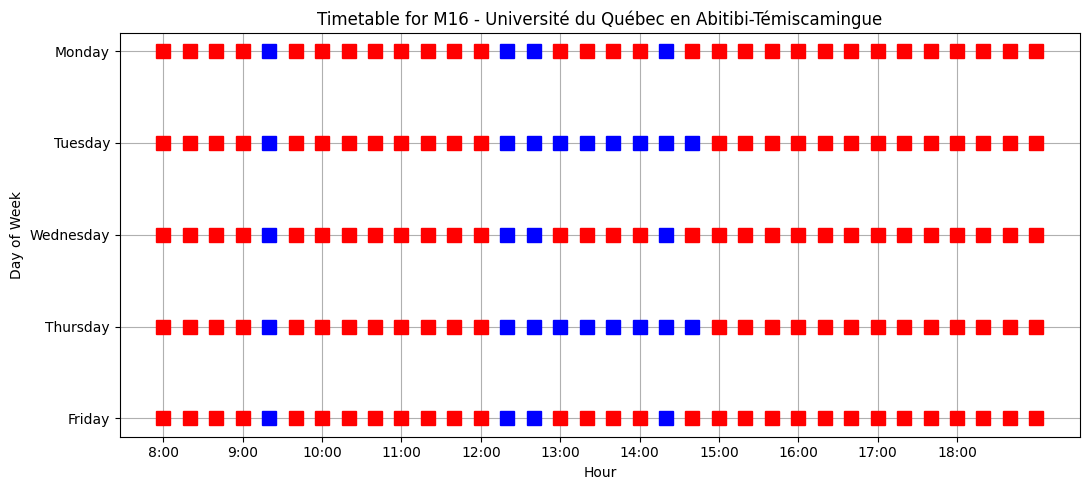

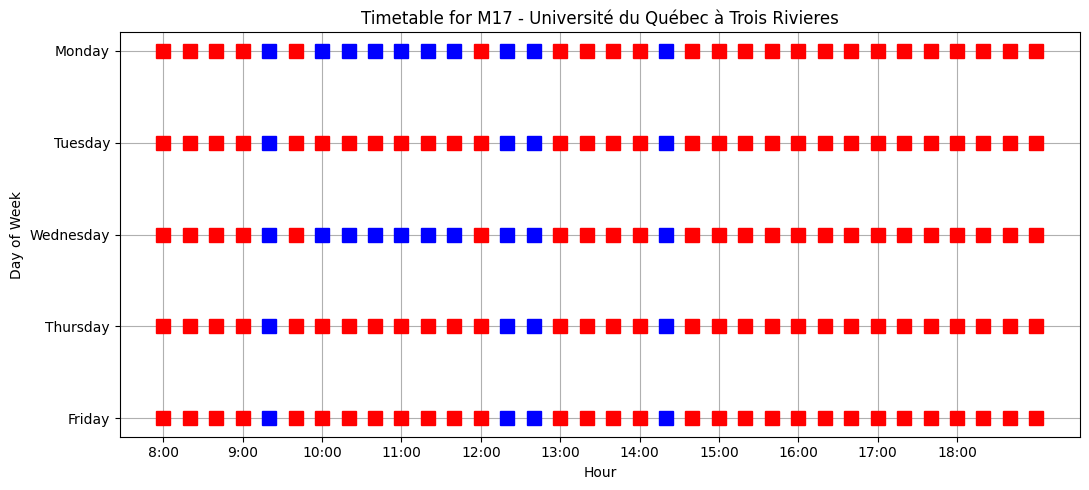

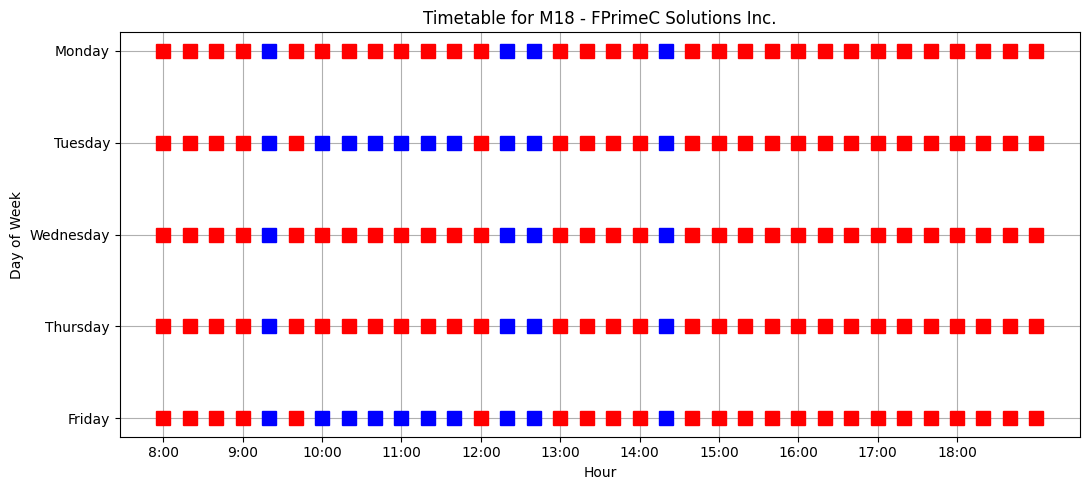

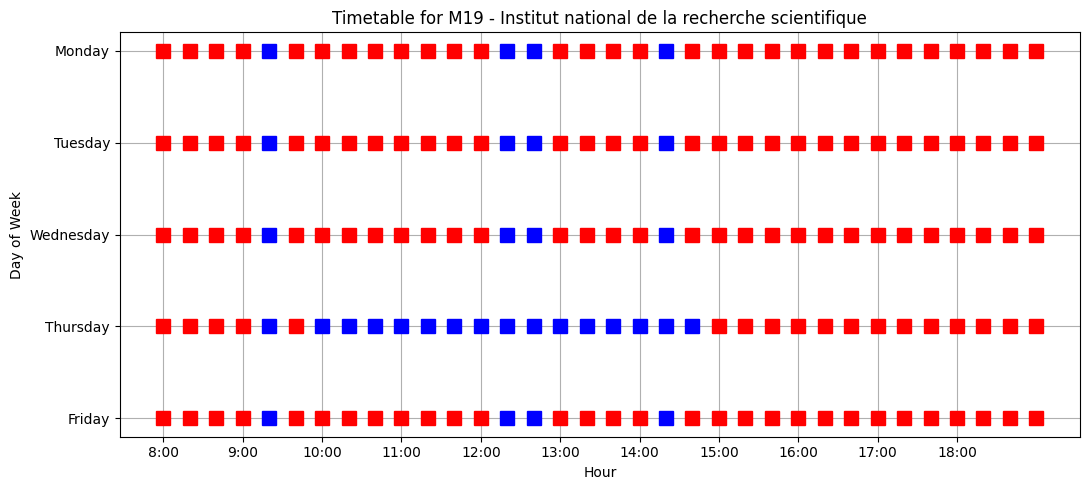

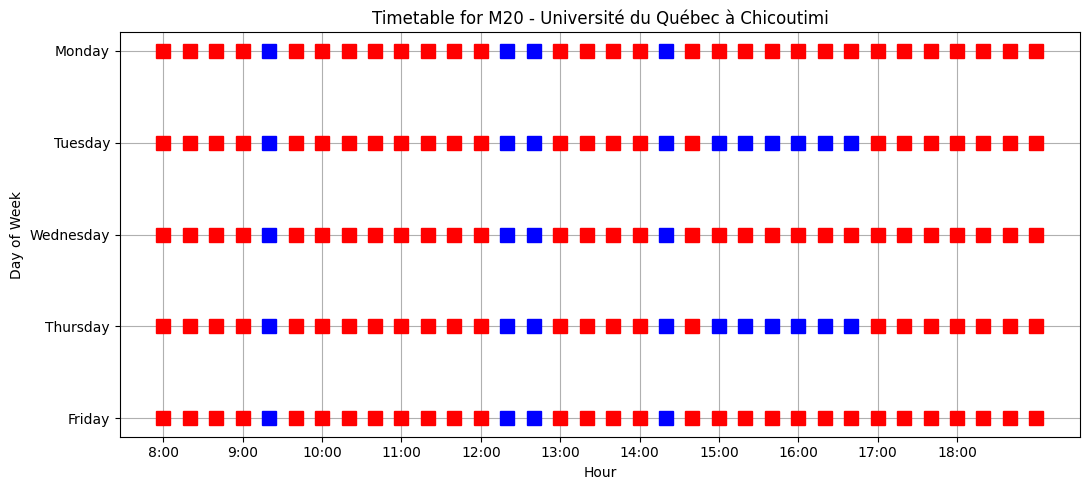

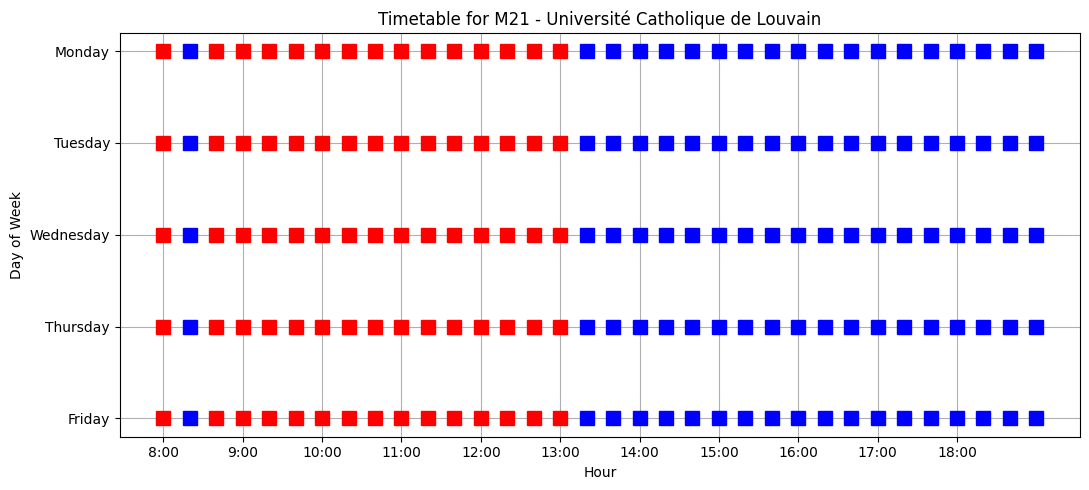

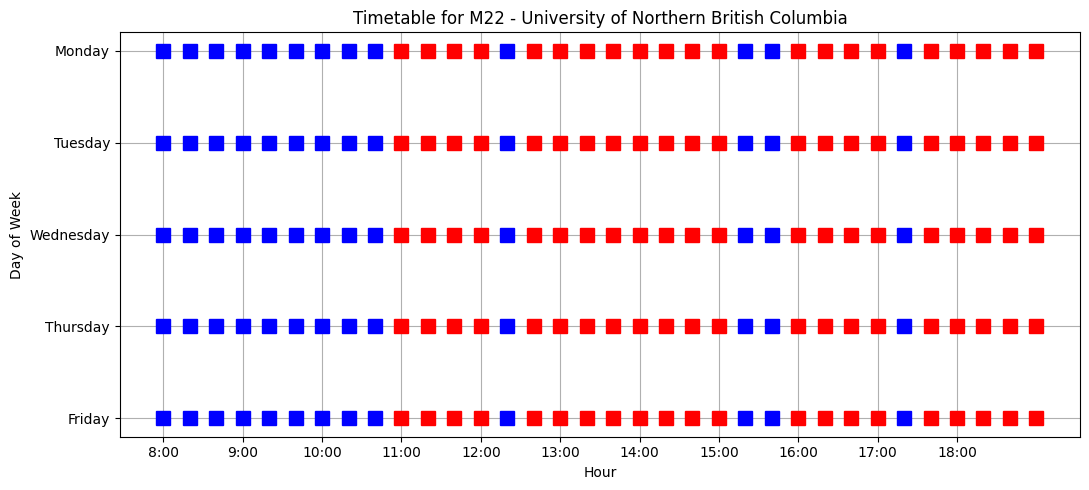

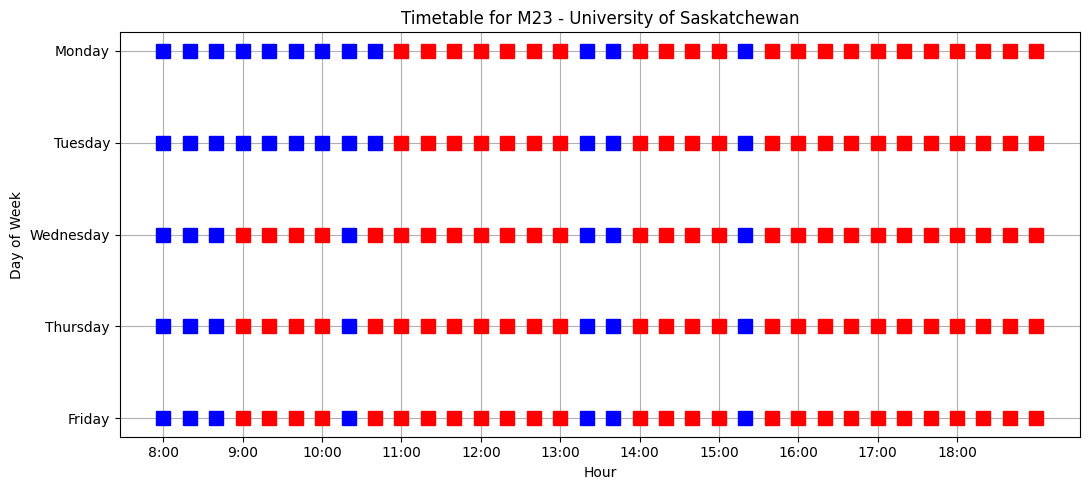

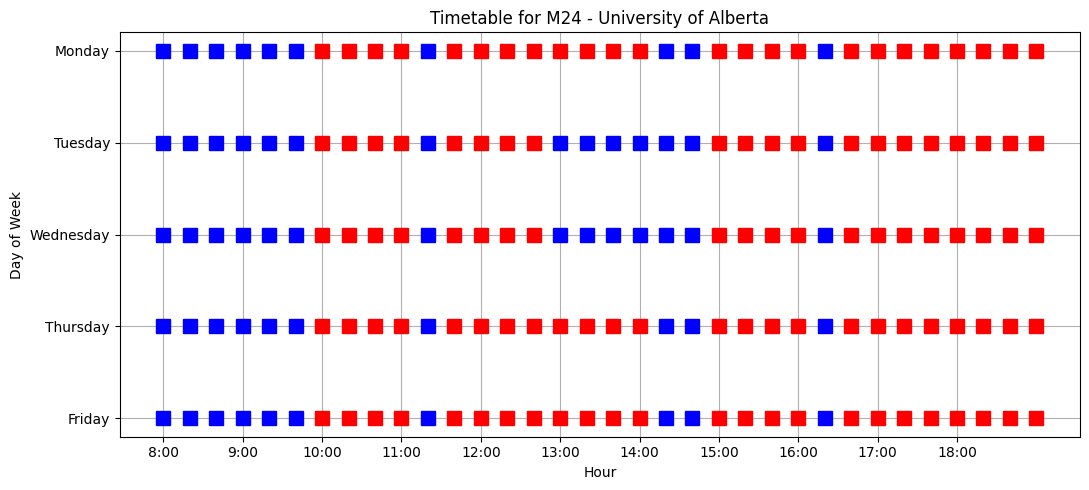

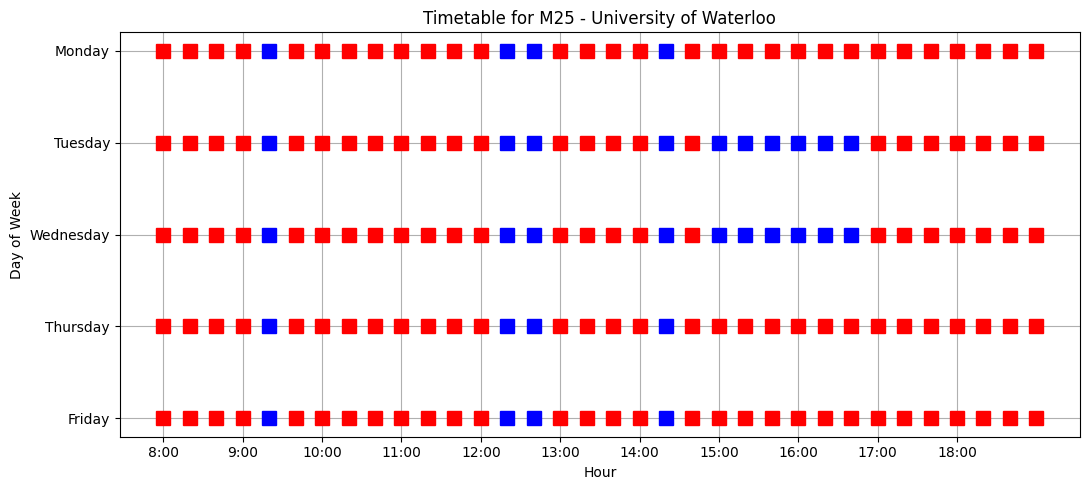

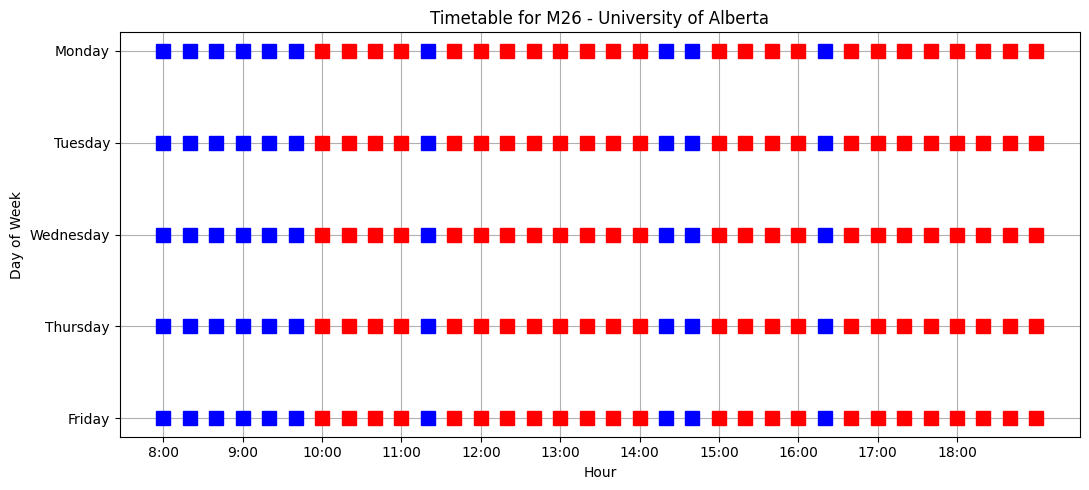

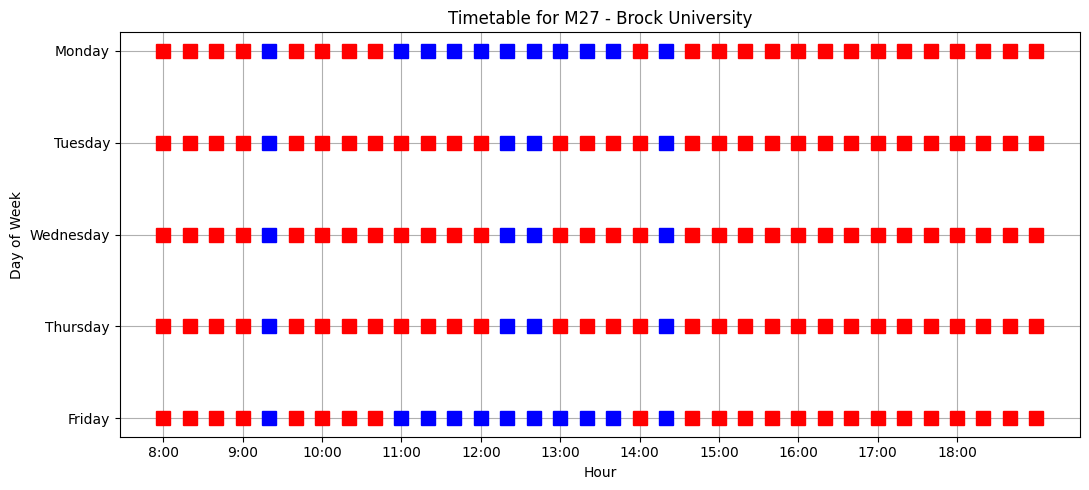

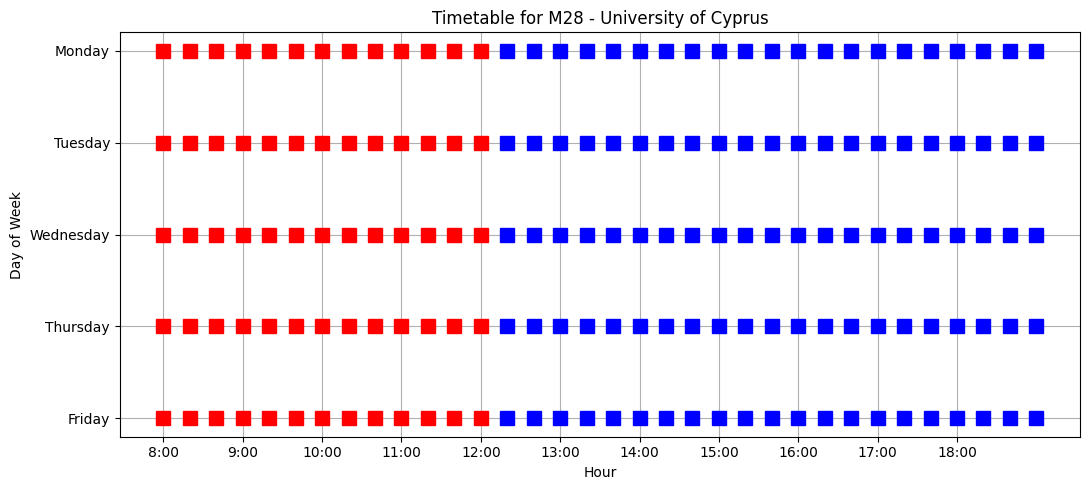

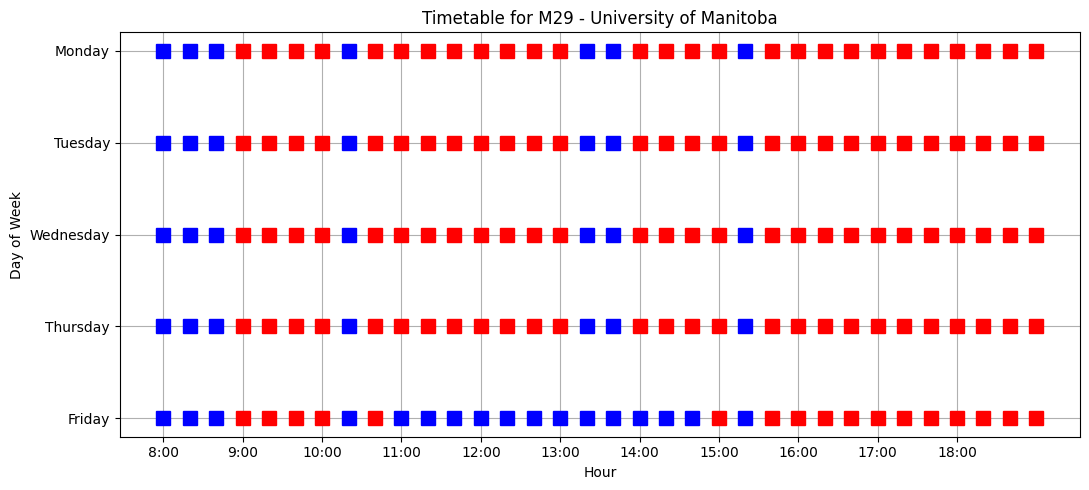

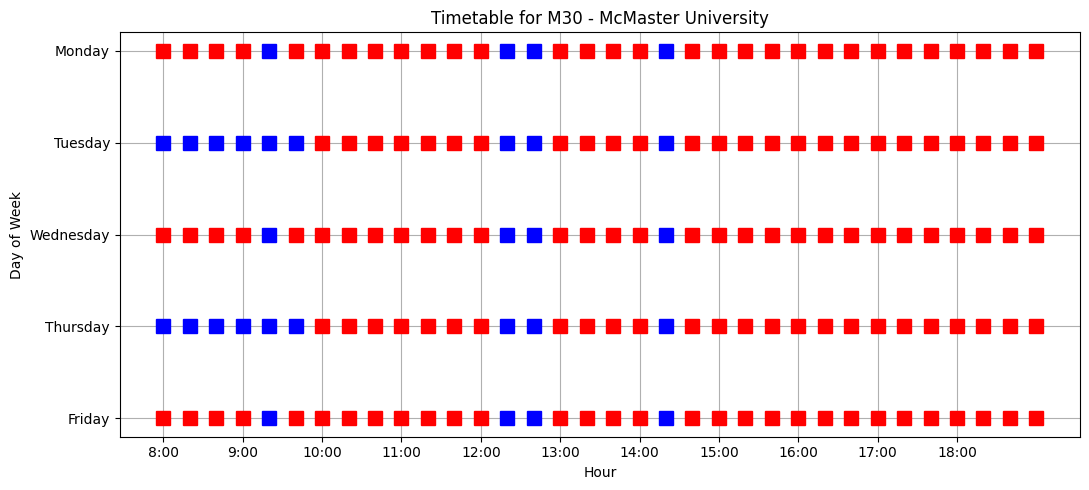

In [7]:
members_availability = raw_universities_map_to_schedule(members)
plot_schedule_map(members)

In [8]:
chairs_availability['C1']

{'university': 'The University of British Columbia',
 'unavailableTimes': {'M': [{'start': 21, 'end': 27}],
  'W': [{'start': 21, 'end': 27}]},
 'timezone_offset': -3,
 'schedule': {'M': {24: True,
   25: True,
   26: True,
   27: True,
   28: True,
   29: True,
   30: True,
   31: True,
   32: True,
   33: False,
   34: False,
   35: False,
   36: False,
   37: True,
   38: False,
   39: False,
   40: False,
   41: False,
   42: False,
   43: False,
   44: False,
   45: False,
   46: True,
   47: True,
   48: False,
   49: False,
   50: False,
   51: False,
   52: True,
   53: False,
   54: False,
   55: False,
   56: False,
   57: False},
  'T': {24: True,
   25: True,
   26: True,
   27: True,
   28: True,
   29: True,
   30: True,
   31: True,
   32: True,
   33: False,
   34: False,
   35: False,
   36: False,
   37: True,
   38: False,
   39: False,
   40: False,
   41: False,
   42: False,
   43: False,
   44: False,
   45: False,
   46: True,
   47: True,
   48: False,
   49: F

In [9]:
# Export the availabilities to a JSON

def export_availabilities_to_json():
    import json
    out_file = './data/allAvailabilities.json'
    accum = {}
    for member in members_availability.keys():
        accum[member] = {}
        accum[member]['university'] = members_availability[member]['university']
        accum[member]['isAvailable'] = {
            'M': [],
            'T': [],
            'W': [],
            'Th': [],
            'F': []
        }
        for day in ['M', 'T', 'W', 'Th', 'F']:
            accum[member]['isAvailable'][day] = [True if isBusy else False for isBusy in
                                                 members_availability[member]['schedule'][day].values()]
    for chair in chairs_availability.keys():
        accum[chair] = {}
        accum[chair]['university'] = chairs_availability[chair]['university']
        accum[chair]['isAvailable'] = {
            'M': [],
            'T': [],
            'W': [],
            'Th': [],
            'F': []
        }
        for day in ['M', 'T', 'W', 'Th', 'F']:
            accum[chair]['isAvailable'][day] = [True if isBusy else False for isBusy in
                                                chairs_availability[chair]['schedule'][day].values()]

    # Write to file
    with open(out_file, 'w') as f:
        json.dump(accum, f)


export_availabilities_to_json()

In [10]:
# Find the average amount of time slots that are unavailable per day, by person

import numpy as np

unavailable_time_member = np.zeros((30, 5))
for i, person in enumerate(members_availability.keys()):
    for day_ind, day in enumerate(['M', 'T', 'W', 'Th', 'F']):
        unavailable_time_member[i][day_ind] = len(
            list(filter(lambda x: x[1] == True, members_availability[person]['schedule'][day].items())))
unavailable_time_member




array([[ 4.,  9.,  4.,  9.,  4.],
       [ 9.,  4.,  9.,  4.,  4.],
       [ 4.,  9.,  4.,  4.,  9.],
       [ 8.,  4.,  4.,  8.,  4.],
       [ 9.,  4.,  4.,  4.,  9.],
       [14., 10., 10., 10., 14.],
       [13.,  7.,  7.,  7.,  7.],
       [12.,  7., 12.,  7.,  7.],
       [ 4.,  4.,  4., 15.,  4.],
       [ 4.,  4.,  4.,  4.,  8.],
       [12.,  7.,  7., 12.,  7.],
       [ 9.,  4.,  4.,  4.,  9.],
       [10.,  4.,  4.,  4., 10.],
       [ 4.,  4., 16.,  4.,  4.],
       [ 4.,  4., 10.,  4., 10.],
       [ 4.,  9.,  4.,  9.,  4.],
       [10.,  4., 10.,  4.,  4.],
       [ 4., 10.,  4.,  4., 10.],
       [ 4.,  4.,  4., 16.,  4.],
       [ 4., 10.,  4., 10.,  4.],
       [19., 19., 19., 19., 19.],
       [13., 13., 13., 13., 13.],
       [12., 12.,  7.,  7.,  7.],
       [10., 14., 14., 10., 10.],
       [ 4., 10., 10.,  4.,  4.],
       [10., 10., 10., 10., 10.],
       [11.,  4.,  4.,  4., 11.],
       [21., 21., 21., 21., 21.],
       [ 7.,  7.,  7.,  7., 17.],
       [ 4.,  

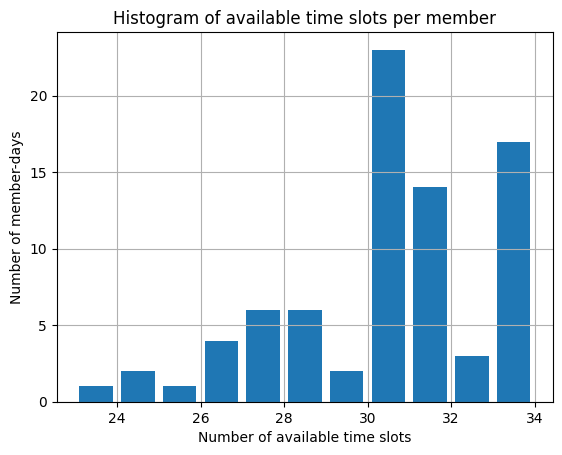

In [11]:
# Convert the matrix into one large array
flat = 40 - unavailable_time_member.flatten()
# then plot it
import matplotlib.pyplot as plt

plt.hist(flat, bins=range(23, 35), rwidth=0.8)
plt.title('Histogram of available time slots per member')
plt.xlabel('Number of available time slots')
plt.ylabel('Number of member-days')
plt.grid(True)
plt.show()



## Initial column Generation

Constraints:
- at most 4 meetings during 1 time slot
- 

In [12]:
# Combine the two dictionaries
all_availability = {**members_availability, **chairs_availability}
all_availability  # P

{'M1': {'university': 'University of Toronto',
  'unavailableTimes': {'T': [{'start': 42, 'end': 48}],
   'Th': [{'start': 42, 'end': 48}]},
  'timezone_offset': 0,
  'schedule': {'M': {24: False,
    25: False,
    26: False,
    27: False,
    28: True,
    29: False,
    30: False,
    31: False,
    32: False,
    33: False,
    34: False,
    35: False,
    36: False,
    37: True,
    38: True,
    39: False,
    40: False,
    41: False,
    42: False,
    43: True,
    44: False,
    45: False,
    46: False,
    47: False,
    48: False,
    49: False,
    50: False,
    51: False,
    52: False,
    53: False,
    54: False,
    55: False,
    56: False,
    57: False},
   'T': {24: False,
    25: False,
    26: False,
    27: False,
    28: True,
    29: False,
    30: False,
    31: False,
    32: False,
    33: False,
    34: False,
    35: False,
    36: False,
    37: True,
    38: True,
    39: False,
    40: False,
    41: False,
    42: True,
    43: True,
    44: Tru

In [13]:
import numpy as np


def get_member_schedule(all_avail: dict):
    schedule = np.zeros((5, 34))
    for day_ind, day in enumerate(['M', 'T', 'W', 'Th', 'F']):
        for p in filter(lambda x: x[0] == 'M', all_avail.keys()):
            for time in range(8 * 3, 19 * 3 + 1):
                # Check if exists
                if time in all_avail[p]['schedule'][day] and all_avail[p]['schedule'][day][time] == False:
                    schedule[day_ind][time - 34] += 1
    return schedule


member_schedule = get_member_schedule(all_availability)
member_schedule.transpose()

array([[22., 24., 23., 22., 20.],
       [25., 27., 26., 25., 23.],
       [27., 30., 29., 27., 27.],
       [ 8.,  9.,  9.,  8.,  8.],
       [ 9., 10., 10.,  9.,  9.],
       [25., 27., 26., 26., 26.],
       [20., 21., 20., 21., 21.],
       [21., 23., 22., 22., 23.],
       [23., 25., 25., 25., 24.],
       [ 5.,  6.,  6.,  6.,  5.],
       [21., 23., 23., 22., 22.],
       [24., 25., 26., 26., 25.],
       [20., 21., 22., 22., 21.],
       [23., 24., 25., 25., 24.],
       [27., 26., 26., 27., 27.],
       [24., 23., 23., 24., 24.],
       [27., 26., 26., 27., 27.],
       [28., 28., 28., 28., 28.],
       [27., 27., 27., 27., 27.],
       [28., 28., 28., 28., 28.],
       [28., 28., 28., 28., 28.],
       [26., 26., 26., 26., 26.],
       [26., 26., 26., 26., 26.],
       [26., 26., 26., 26., 26.],
       [23., 22., 23., 21., 23.],
       [20., 19., 20., 18., 20.],
       [23., 22., 23., 21., 23.],
       [24., 23., 25., 24., 25.],
       [ 5.,  6.,  6.,  7.,  7.],
       [24., 2

In [14]:

def get_chair_schedule(all_avail: dict):
    schedule = np.zeros((5, 34))
    for day_ind, day in enumerate(['M', 'T', 'W', 'Th', 'F']):
        for p in filter(lambda x: x[0] == 'C', all_avail.keys()):
            for time in range(8 * 3, 19 * 3 + 1):
                # Check if exists
                if time in all_avail[p]['schedule'][day] and all_avail[p]['schedule'][day][time] == False:
                    schedule[day_ind][time - 34] += 1
    return schedule


chair_schedule = get_chair_schedule(all_availability)
chair_schedule.transpose()

array([[ 8.,  7.,  8.,  7.,  6.],
       [ 9.,  8.,  9.,  8.,  7.],
       [ 9.,  9., 10.,  9.,  9.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 4.,  3.,  4.,  3.,  4.],
       [ 8.,  9.,  9.,  9.,  9.],
       [ 8.,  9.,  9.,  9.,  9.],
       [ 8.,  9.,  9.,  9.,  9.],
       [ 9., 10.,  9., 10., 10.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 8.,  9.,  8.,  9.,  9.],
       [10., 10., 10., 10., 10.],
       [ 7.,  7.,  7.,  7.,  7.],
       [ 7.,  7.,  7.,  7.,  7.],
       [10., 10., 10., 10., 10.],
       [ 9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [ 7.,  7.,  7.,  7.,  7.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [ 6.,  6.,  6.,  5.,  6.],
       [ 6.,  6.,  6.,  5.,  6.],
       [ 6.,  6.,  6.,  5.,  6.],
       [ 6.,  5.,  6.,  5.,  5.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 6.,  

In [15]:
def plot_schedule(schedule, title='Availability of all members and chairs'):
    # Plot out each row of the schedule in a line graph
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    for i, day in enumerate(days):
        plt.plot(schedule[i], label=day)
    plt.title(title)
    plt.xlabel('Time (8am-7:20pm)')
    plt.ylabel('Number of people available')
    plt.xticks(range(0, 34), [f"{i // 3}:{(i % 3) * 20:02d}" for i in range(8 * 3, 19 * 3 + 1)])
    plt.grid(True)
    plt.legend()
    plt.show()





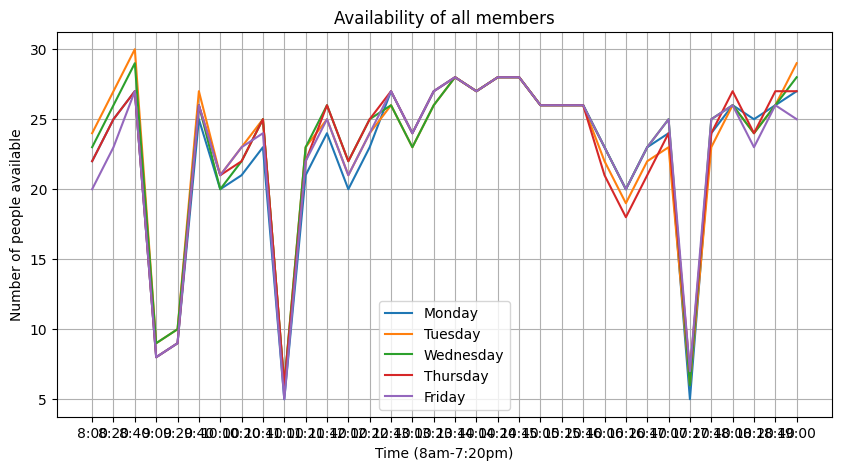

In [16]:
plot_schedule(member_schedule, "Availability of all members")

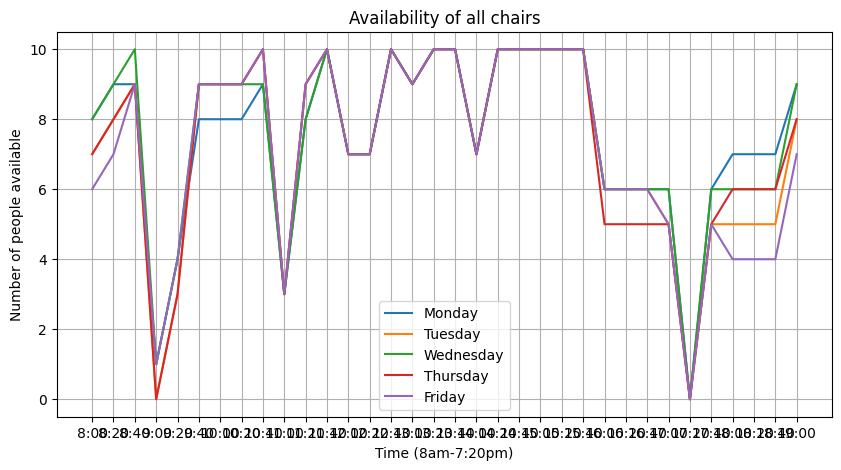

In [17]:
plot_schedule(chair_schedule, title='Availability of all chairs')

In [18]:
# Find the maximum number of meetings that can happen (5 members and 1 chair, 4 meetings per time slot)

# For each time slot, find the minimum of the number of available members and the number of available chairs
# Then find the maximum of those minimums
max_meetings = np.zeros((5, 34))
for day in range(5):
    for i in range(34):
        max_meetings[day][i] = min(chair_schedule[day][i], member_schedule[day][i] // 5, 4)
        # max_meetings[i] = min(np.max(member_schedule[:, i]), np.max(chair_schedule[:, i]), 4)

max_meetings

array([[4., 4., 4., 1., 1., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4.,
        4., 4.],
       [4., 4., 4., 0., 2., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 0., 4., 4., 4.,
        4., 4.],
       [4., 4., 4., 1., 2., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4.,
        4., 4.],
       [4., 4., 4., 0., 1., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 0., 4., 4., 4.,
        4., 4.],
       [4., 4., 4., 1., 1., 4., 4., 4., 4., 1., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4.,
        4., 4.]])

In [19]:
# Export the max meetings to a CSV
import csv

with open('./data/maxMeetings.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Day', 'Time', 'Max Meetings'])
    for day_ind, day in enumerate(['M', 'T', 'W', 'Th', 'F']):
        for time in range(8 * 3, 19 * 3 + 1):
            writer.writerow([day_ind, time, max_meetings[day_ind][time - 8 * 3]])


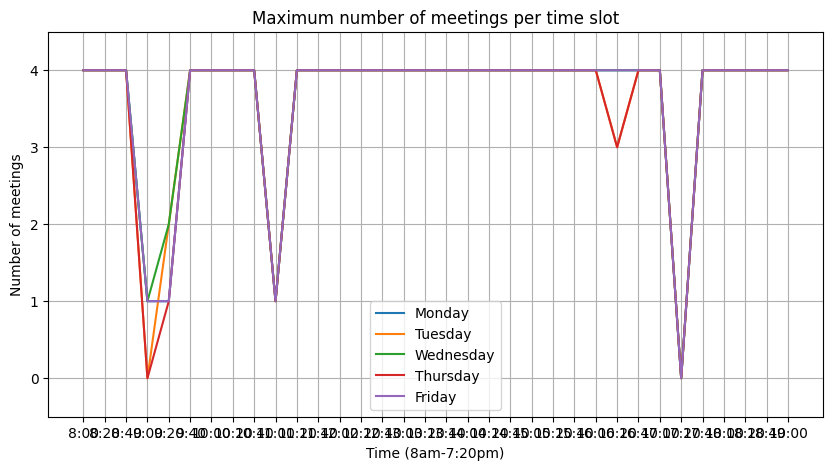

In [20]:
# Plot out max meetings per day
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
for i, day in enumerate(days):
    plt.plot(max_meetings[i], label=day)
plt.title('Maximum number of meetings per time slot')
plt.xlabel('Time (8am-7:20pm)')
plt.ylabel('Number of meetings')
plt.ylim(-0.5, 4.5)
plt.xticks(range(0, 34), [f"{i // 3}:{(i % 3) * 20:02d}" for i in range(8 * 3, 19 * 3 + 1)])
plt.grid(True)
plt.legend()
plt.show()



## Initial column generation

In [21]:
schedulable = np.zeros((40, 5, 34))

for day_ind, day in enumerate(['M', 'T', 'W', 'Th', 'F']):
    for p_ind, p in enumerate(all_availability.keys()):
        for time in range(8 * 3, 19 * 3 + 1):
            # Check if exists
            if time in all_availability[p]['schedule'][day] and all_availability[p]['schedule'][day][time] == False:
                schedulable[p_ind][day_ind][time - 8 * 3] = 1

schedulable[39]

array([[1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])

In [22]:
np.where(schedulable[0][0] == 1)[0]

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [23]:
class Person:
    def __init__(self, name: str, availability: np.ndarray[(5, 34)]):
        self.name = name
        self.availability = availability
        self.columns = []

    def generate_columns(self):
        from itertools import product
        self.columns = []  # Reset

        for day in range(5):
            avail_for_meeting = np.where(self.availability[day] == 1)[0]
            perms = [list(x) for x in product([0, 1], repeat=len(avail_for_meeting))]
            # Assign perms to the indicies in avail_for_meeting
            for perm in perms:
                col = np.zeros(34)
                for i, p in enumerate(avail_for_meeting):
                    col[p] = perm[i]
                self.columns.append(col)

    def __str__(self):
        return self.name

    def __repr__(self):
        return self.name


people = [Person(f'{name} - {all_availability[name]['university']}', schedulable[i]) for i, name in
          enumerate(all_availability.keys())]

people




SyntaxError: f-string: unmatched '[' (1111661888.py, line 28)

In [ ]:
# people[0].columns

numCombo = [1771, 1, 1771, 42504, 10626, 230230, 53130, 230230, 888030, 231, 53130, 888030, 53130, 1, 21, 1771, 21, 10626, 1771, 888030, 10626, 888030, 3108105, 888030, 3108105, 3108105, 5311735, 230230]
# Find the product of numCombo
from math import prod

prod(numCombo)